# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.001
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.001
0.001
0.002
0.002
0.002
0.002
0.002
0.004
-0.001
-0.002
-0.002
-0.002
0.001
0.0
0.0
0.001
0.994
0.994
0.992
0.992
1.983
1.986
1.988
1.986
1.986
2.985
2.985
2.983
2.984
3.978
3.98
3.982
3.981
3.981
4.981
4.981
4.978
4.979
5.981
5.981
5.981
5.98
6.7
6.702
6.704
6.704
6.704
7.432
7.432
7.432
7.431
8.427
8.427
8.426
8.424
9.419
9.422
9.426
9.425
9.425
10.418
10.424
10.424
10.423
10.423
11.418
11.42
11.424
11.422
11.422
12.407
12.41
12.412
12.412
12.412
13.405
13.407
13.409
13.409
13.409
14.005
14.005
14.003
14.003
14.599
14.602
14.605
14.604
14.604
15.593
15.593
15.592
15.592
16.579
16.582
16.584
16.583
16.583
17.565
17.565
17.564
17.564
18.558
18.558
18.557
18.557
19.537
19.54
19.541
19.541
19.541
20.539
20.538
20.537
20.537
21.387
21.387
21.386
21.387
22.223
22.223
22.223
22.223
22.223
23.223
23.222
23.222
24.228
24.228
24.226
24.226
25.216
25.216
25.215
25.215
26.213
2

58.259
58.262
58.261
58.261
58.26
58.26
58.259
58.259
58.259
58.259
58.258
58.258
58.258
58.258
58.258
58.258
58.257
58.256
58.256
58.256
58.256
58.256
58.256
58.256
58.256
58.256
58.256
58.256
58.256
58.255
58.253
58.253
58.253
58.253
58.279
58.309
58.341
58.341
58.363
58.363
58.362
58.361
58.359
58.359
58.36
58.36
58.36
58.375
58.375
58.375
58.375
58.373
58.373
58.375
58.375
58.374
58.374
58.374
58.372
58.372
58.372
58.373
58.376
58.373
58.372
58.37
58.369
58.369
58.369
58.371
58.372
58.372
58.372
58.369
58.369
58.368
58.368
58.368
58.367
58.367
58.368
58.368
58.368
58.368
58.368
58.368
58.368
58.366
58.365
58.365
58.365
58.394
58.424
58.455
58.484
58.514
58.544
58.573
58.631
58.631
58.631
58.647
58.647
58.647
58.647
58.647
58.645
58.645
58.645
58.646
58.651
58.651
58.65
58.65
58.65
58.65
58.653
58.652
58.652
58.65
58.65
58.65
58.65
58.65
58.651
58.651
58.651
58.65
58.65
58.65
58.65
58.649
58.648
58.648
58.648
58.648
58.648
58.648
58.648
58.648
58.648
58.648
58.648
58.648
58.646
58.6

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1517,3034,60.202
1518,3036,60.202
1519,3038,60.201
1520,3040,60.201


<IPython.core.display.Javascript object>


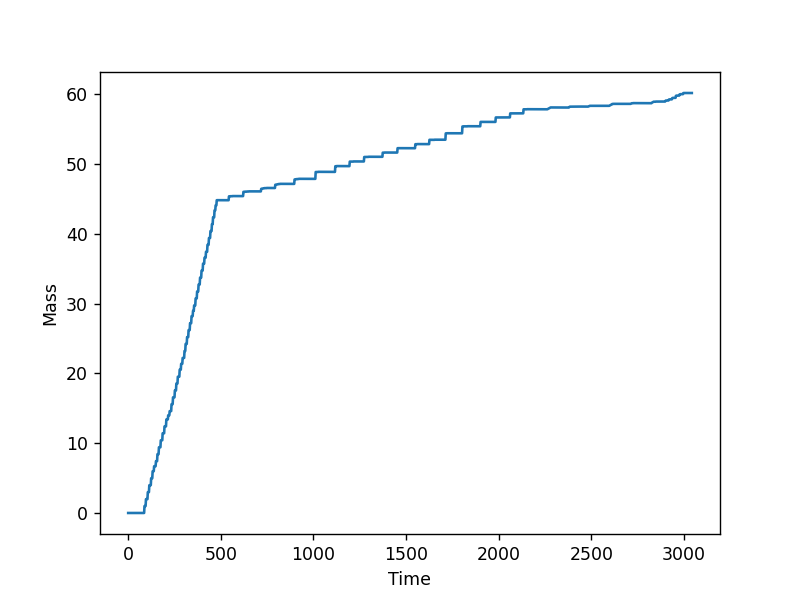

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_130323_S163-168.csv')